In [8]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Notebook to read in the nexus files and only save the useful stuff to slim the files down
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

In [19]:
columms_to_read = ["event_id","kin_energy", "primary", "particle_id", "initial_momentum_x", "initial_momentum_y","initial_momentum_z"]
particles = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_leptoquark.h5", "MC/particles")

particles = particles[columms_to_read]

display(particles)

,event_id,kin_energy,primary,particle_id,initial_momentum_x,initial_momentum_y,initial_momentum_z
0,0,0.279049,1,2,-0.202207,0.542210,-0.167856
1,0,0.015486,0,10,0.105725,-0.066236,0.022403
2,0,0.000021,0,9,-0.000965,0.004464,0.000394
3,0,0.000021,0,8,-0.003001,0.002889,-0.001913
4,0,0.000117,0,7,0.002746,0.010317,-0.002364
...,...,...,...,...,...,...,...
4655084,99999,0.000101,0,10,-0.005260,-0.001854,0.008497
4655085,99999,0.003700,0,9,0.040024,0.042686,-0.019268
4655086,99999,0.008084,0,8,-0.033770,-0.084026,0.011233
4655087,99999,0.020240,0,5,-0.026812,0.031672,-0.139187


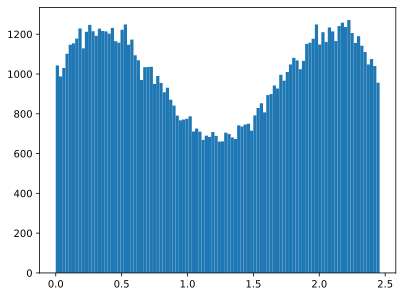

In [23]:
plt.figure()
plt.hist(particles[particles.particle_id==1].kin_energy, bins=100);



,event_id,kin_energy_1,primary_1,particle_id_1,initial_momentum_x_1,initial_momentum_y_1,initial_momentum_z_1,kin_energy_2,primary_2,particle_id_2,initial_momentum_x_2,initial_momentum_y_2,initial_momentum_z_2
0,0,2.178950,1,1,0.537276,2.573956,0.246560,0.279049,1,2,-0.202207,0.542210,-0.167856
1,1,2.157862,1,1,0.452096,2.493800,-0.662022,0.300120,1,2,0.015836,0.009902,0.629639
2,2,0.888109,1,1,0.604365,0.987039,0.597396,1.569875,1,2,0.574424,-1.009564,1.649162
3,3,0.635476,1,1,-0.843578,-0.419336,0.407205,1.822505,1,2,-0.989688,2.030218,-0.287842
4,4,1.828491,1,1,0.341172,1.479270,1.705127,0.629491,1,2,0.320809,-0.406557,0.878288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.760453,1,1,1.798178,-0.310537,1.252397,0.697543,1,2,0.327583,0.951120,-0.433028
99996,99996,0.284038,1,1,-0.488127,0.040363,0.362032,2.173942,1,2,1.737192,-0.558118,1.902224
99997,99997,0.216359,1,1,0.058294,-0.302197,-0.416182,2.241606,1,2,-1.645583,-0.743488,-2.013703
99998,99998,1.164816,1,1,1.440846,-0.023206,0.686045,1.293153,1,2,1.576510,-0.516246,0.491884


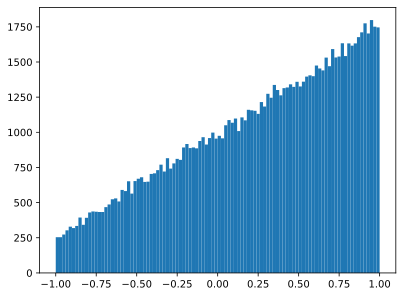

In [22]:
# Calculate the angle between momentum vectors
def calculate_angle(row):
    # Extract momentum components for particle 1
    p1 = np.array([row['initial_momentum_x_1'], row['initial_momentum_y_1'], row['initial_momentum_z_1']])
    # Extract momentum components for particle 2
    p2 = np.array([row['initial_momentum_x_2'], row['initial_momentum_y_2'], row['initial_momentum_z_2']])
    
    # Calculate dot product and magnitudes
    dot_product = np.dot(p1, p2)
    magnitude_p1 = np.linalg.norm(p1)
    magnitude_p2 = np.linalg.norm(p2)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (magnitude_p1 * magnitude_p2)
    
    # Ensure the value is within the valid range for arccos (to avoid numerical errors)
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in radians
    # angle = np.arccos(cos_theta)
    
    return cos_theta

# Filter particles with particle_id 1 and 2
particle_1 = particles[particles.particle_id == 1].copy()
particle_2 = particles[particles.particle_id == 2].copy()

# Merge the DataFrames on 'event' to pair particles from the same event
merged_particles = pd.merge(particle_1, particle_2, on="event_id", suffixes=('_1', '_2'))
display(merged_particles)


# Apply the function to each row in the merged DataFrame
merged_particles['angle'] = merged_particles.apply(calculate_angle, axis=1)


plt.figure()
plt.hist(merged_particles['angle'], bins = 100);

In [36]:
# Load in the smeared files and check them

files = ["../config/ATPC_leptoquark.h5", "../config/ATPC_leptoquark1mm_smear.h5", "../config/ATPC_leptoquark2mm_smear.h5", "../config/ATPC_leptoquark4mm_smear.h5", "../config/ATPC_leptoquark10mm_smear.h5"]

hits = []

for f in files:
    hits.append(pd.read_hdf(f, "MC/hits"))


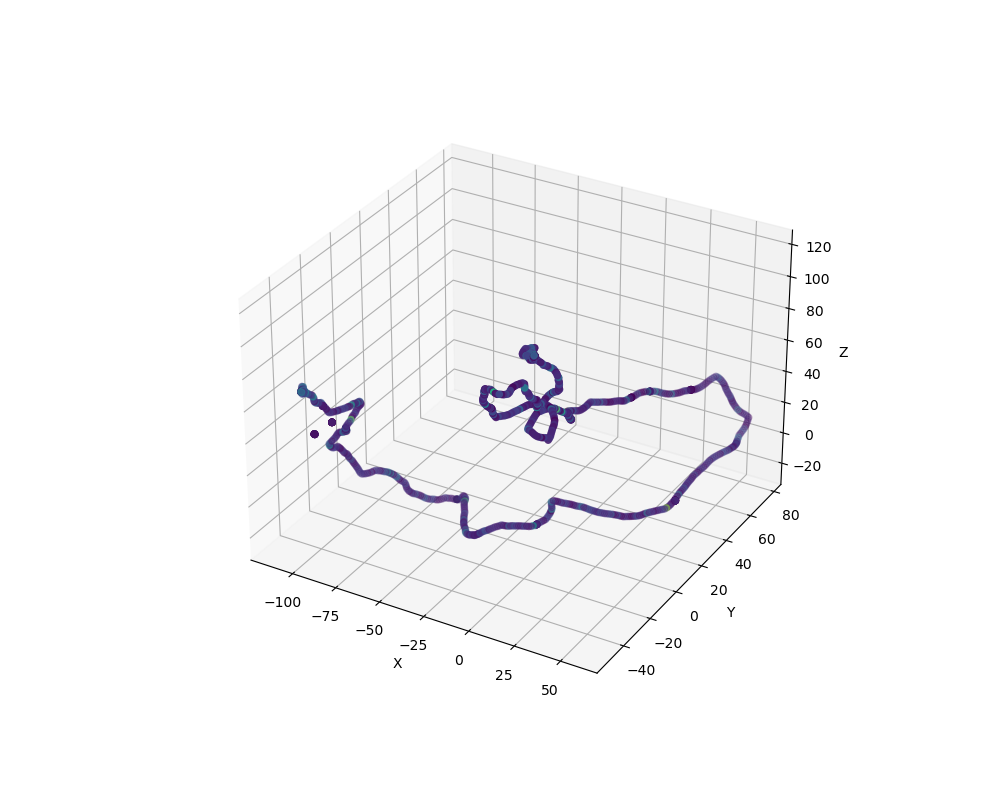

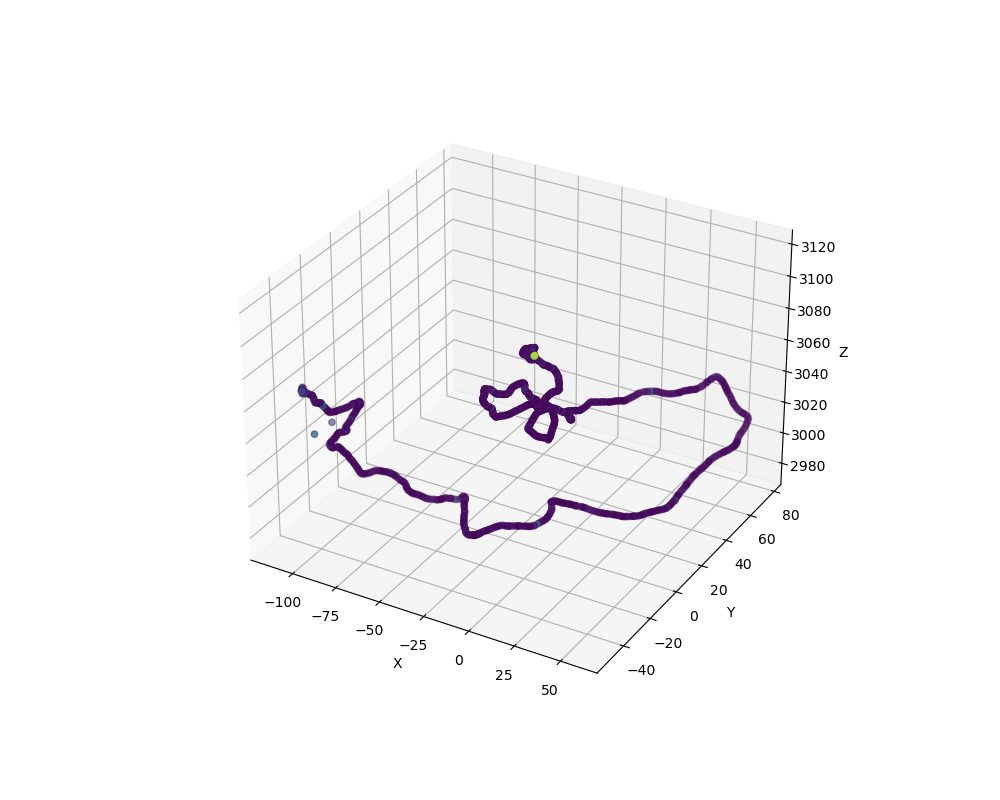

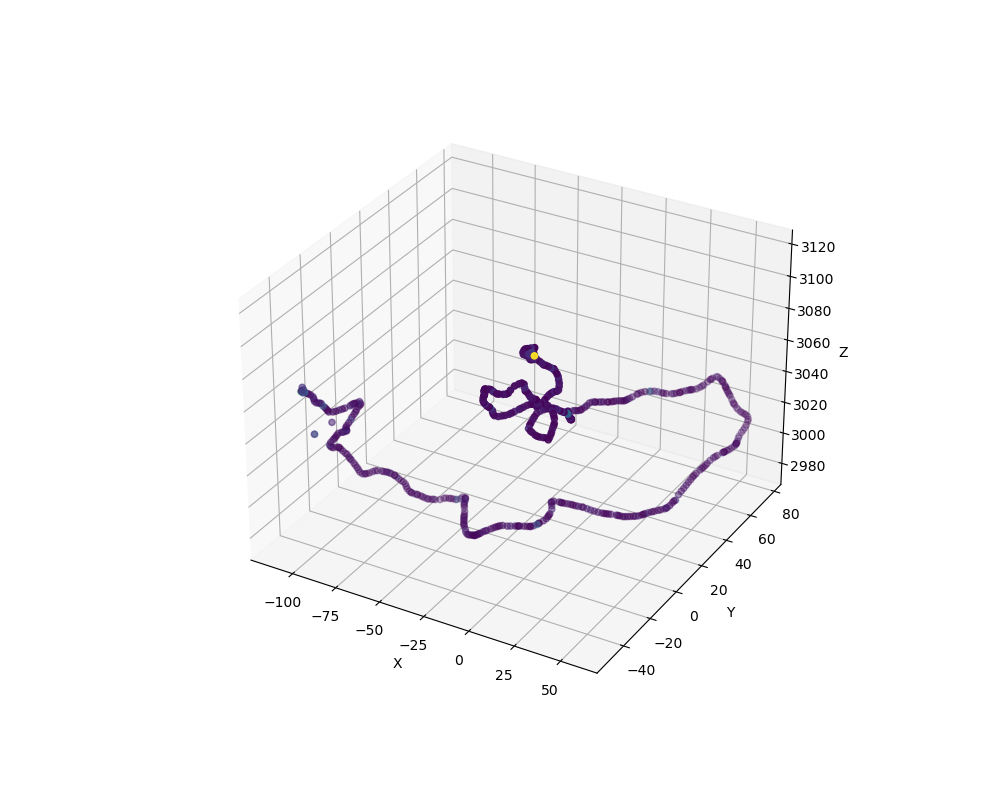

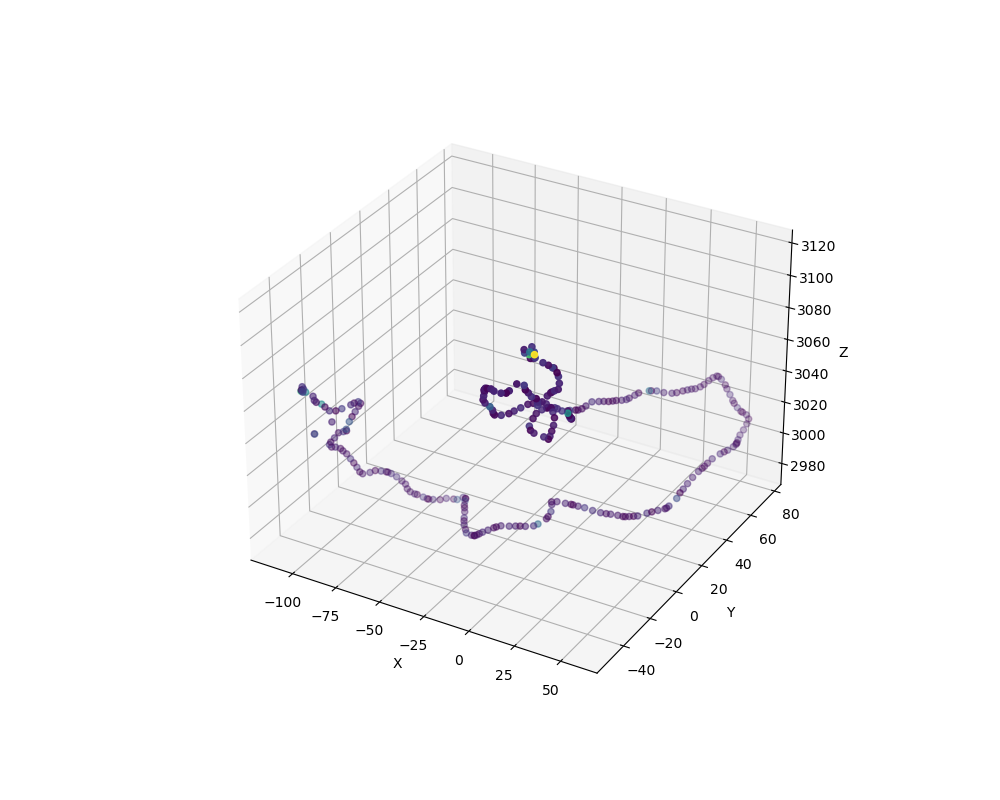

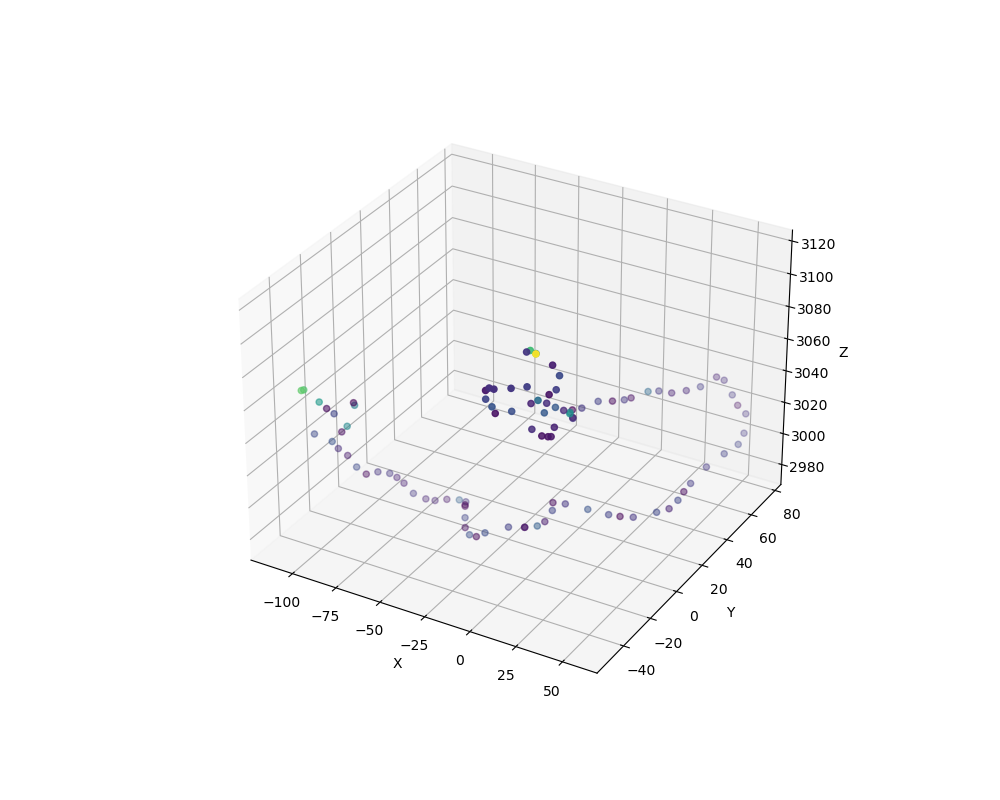

In [37]:
%matplotlib widget


for h in hits:

    event = h[h.event_id ==0]


    # Plot in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # colors = ['r' if count == 1 or count == 0 else 'k' for count in connection_count]
    ax.scatter(event['x'], event['y'], event['z'], marker='o', c=event["energy"])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

